# Árvores de Decisão: Regressão

## Importação das bibliotecas

In [1]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# from dtreeviz.trees import dtreeviz
import dtreeviz

# Pacotes de modelagem
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score

# Módulo de Análise Exploratória
import aed

## Importação da base de dados

In [2]:
df = pd.read_csv("/home/lucasmateus/dbt-projects/projetos_lucas/curso_preditiva/arvores_decisao/pt_2/base_funcionarios_v4.csv", index_col=0)

## Preparação dos Dados

### Missing Values

In [3]:
df.isnull().sum()

Salario               0
Anos_Educ_Superior    0
Tempo_Empresa         0
Tempo_de_Carreira     0
Possui_Skill_Dados    0
dtype: int64

### Duplicações

In [4]:
df.duplicated().sum()

0

### Tipos de Variáveis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salario             46 non-null     float64
 1   Anos_Educ_Superior  46 non-null     int64  
 2   Tempo_Empresa       46 non-null     int64  
 3   Tempo_de_Carreira   46 non-null     float64
 4   Possui_Skill_Dados  46 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 2.2+ KB


In [6]:
df['Possui_Skill_Dados'] = df['Possui_Skill_Dados'].replace({'Sim': 1, 'Não': 0})

In [7]:
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados
0,5517.4,3,3,9.777079,0
1,6399.9,4,6,3.765998,0
2,6206.7,6,3,7.926264,0
3,6060.6,4,5,2.233497,0
4,6122.7,2,9,26.821842,0


## Análise Exploratória dos Dados

### Dispersão por Classe

/home/lucasmateus/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight


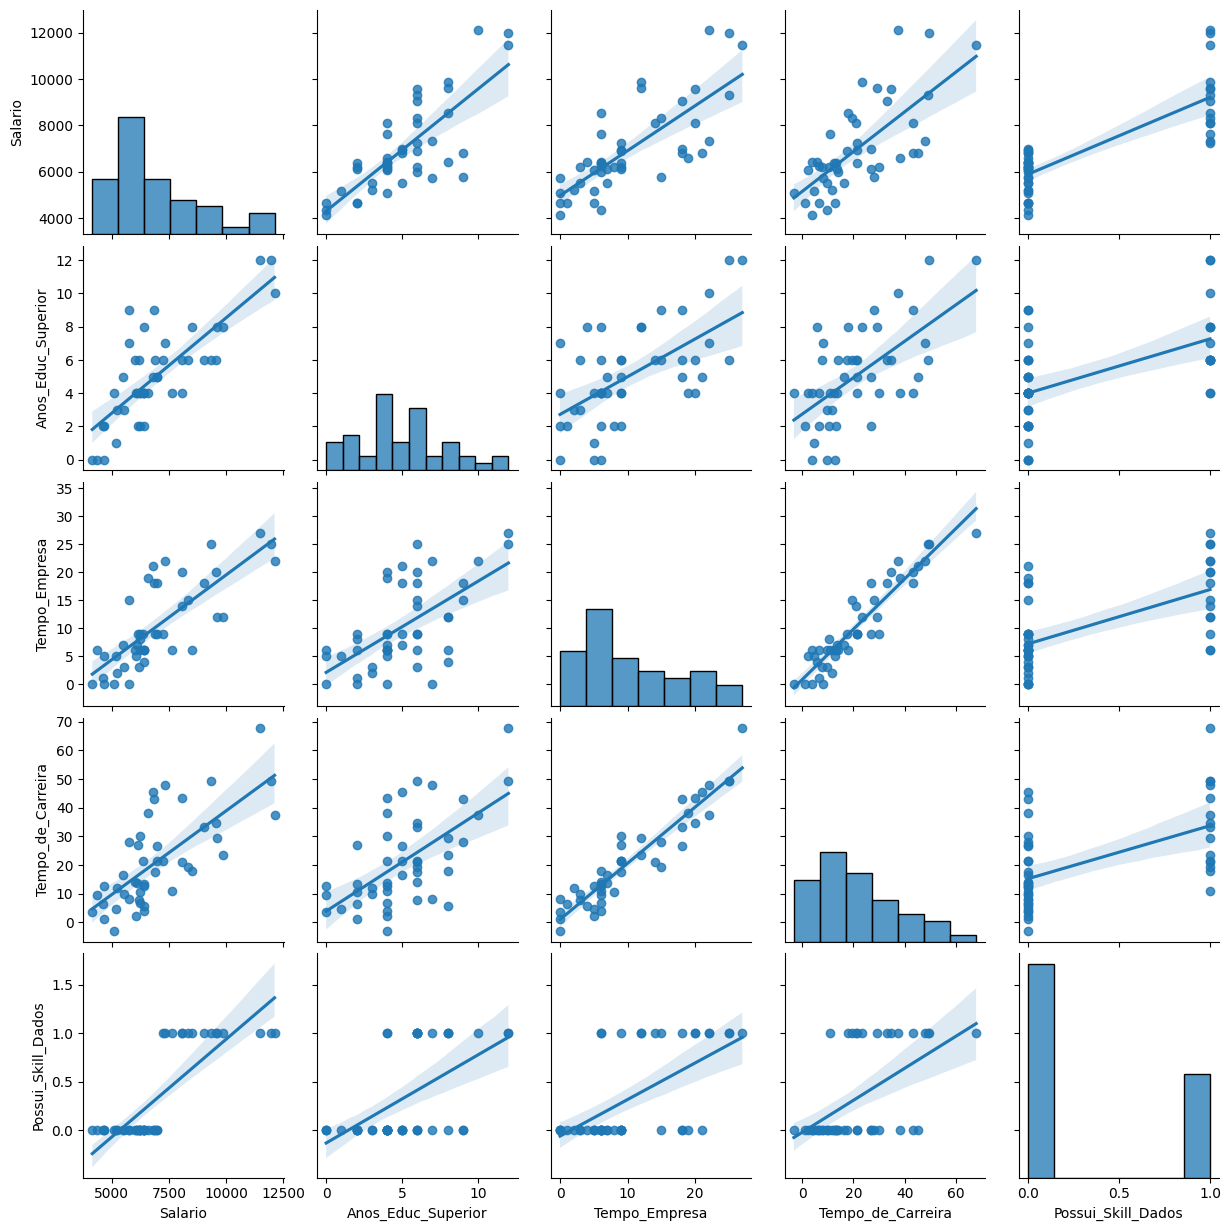

In [8]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df, kind='reg')

### Relatórios Pandas Profiling e SweetViz

In [9]:
perfil_pp, perfil_sv = aed.gera_relatorios_aed(df=df,
                                               target_feat='Salario')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/lucasmateus/.local/lib/python3.10/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |          | [  0%]   00:00 -> (? left)

Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Desenvolvimento do Modelo: Árvores de Decisão

In [10]:
# Target (variável resposta)
y = df['Salario']

# Features (variáveis explicativas)
x = df.drop('Salario', axis = 1)

### Treinamento da Árvore de Decisão

In [11]:
modelo_salario = DecisionTreeRegressor(max_depth=2, 
                                       random_state=42)
modelo_salario.fit(x, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

#### Interpretação do Modelo

Text(0.5, 1.0, 'Estimativa de Salários\n Utilizando Árvores de Decisão')

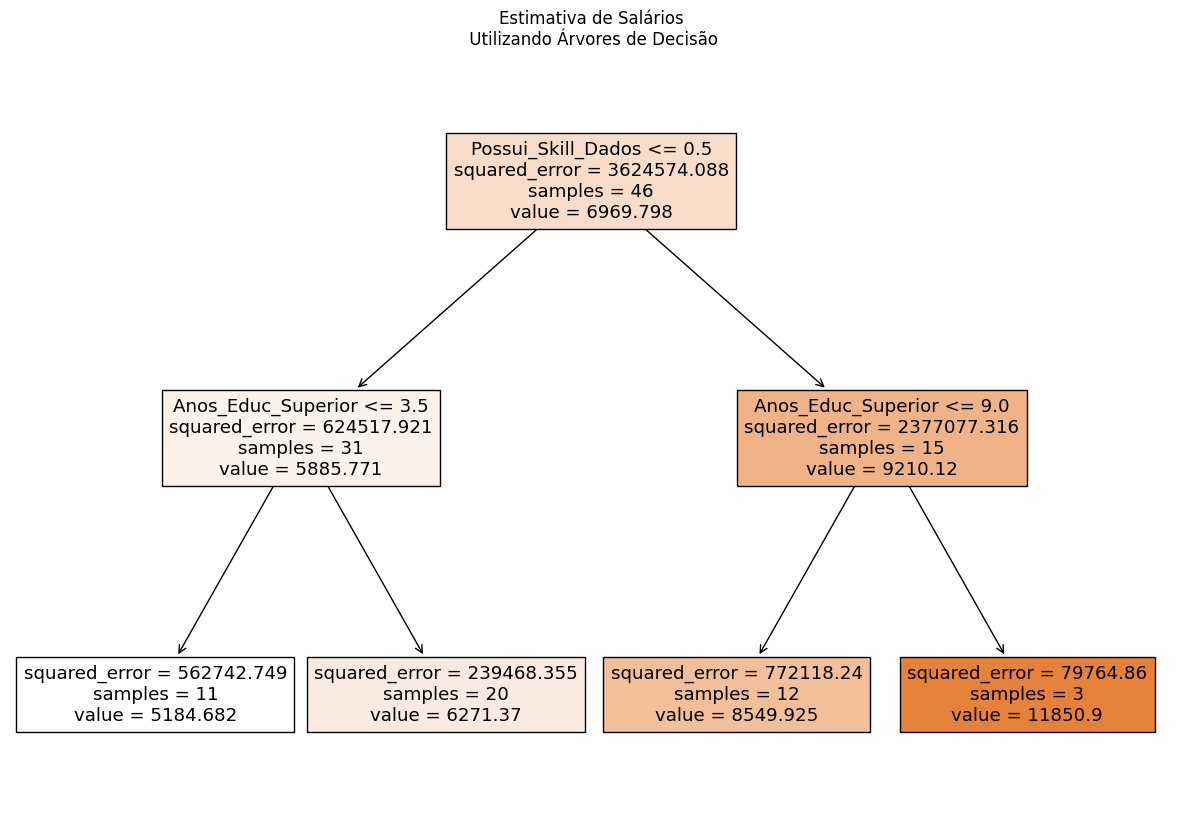

In [12]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_salario,
               feature_names=features,
               filled=True)
plt.title("Estimativa de Salários\n Utilizando Árvores de Decisão")

In [13]:
viz = dtreeviz.model(modelo_salario, 
               X_train=x, y_train=y, 
               target_name='Salario',
               feature_names=features)

/home/lucasmateus/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


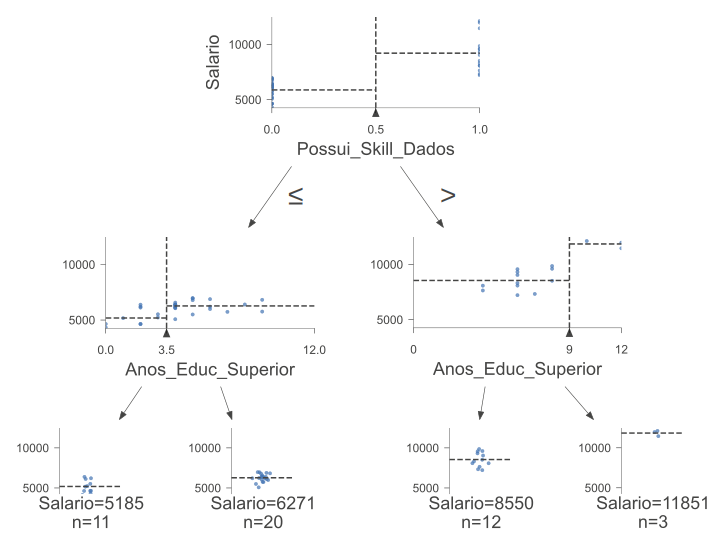

In [14]:
viz.view(precision=0, scale=2.0)

#### Desempenho do Modelo

In [15]:
# Cálculo do desempenho do modelo: R²
r2_score(y, modelo_salario.predict(x))

0.8771414822406586

### Divisão das bases em Treino e Teste

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=42)

### Treinamento da Árvore de Decisão

In [18]:
modelo_salario = DecisionTreeRegressor(max_depth=2, 
                                       min_samples_leaf=5,
                                       random_state=42)
modelo_salario.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=42)

#### Interpretação do Modelo

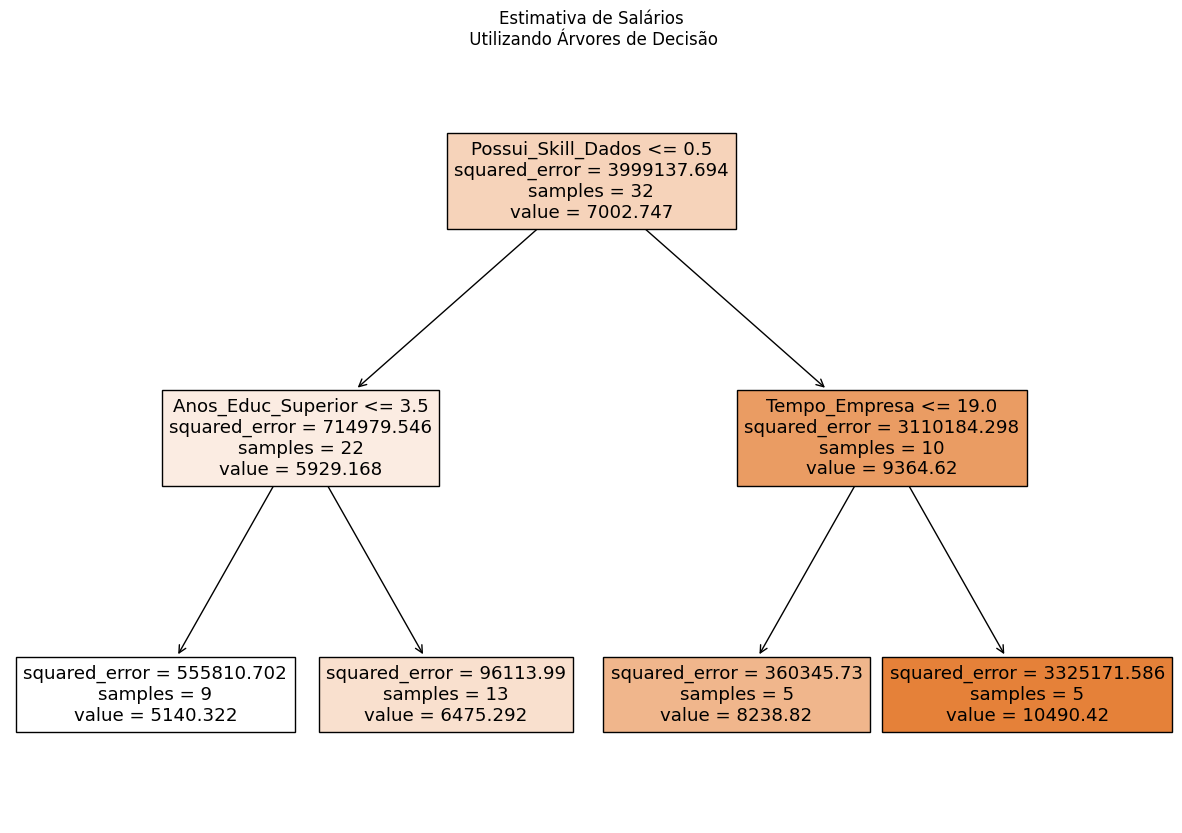

In [19]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_salario,
               feature_names=features,
               filled=True);
plt.title("Estimativa de Salários\n Utilizando Árvores de Decisão");

In [20]:
viz = dtreeviz.model(modelo_salario, 
               X_train=x, y_train=y, 
               target_name='Salario',
               feature_names=features)

/home/lucasmateus/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


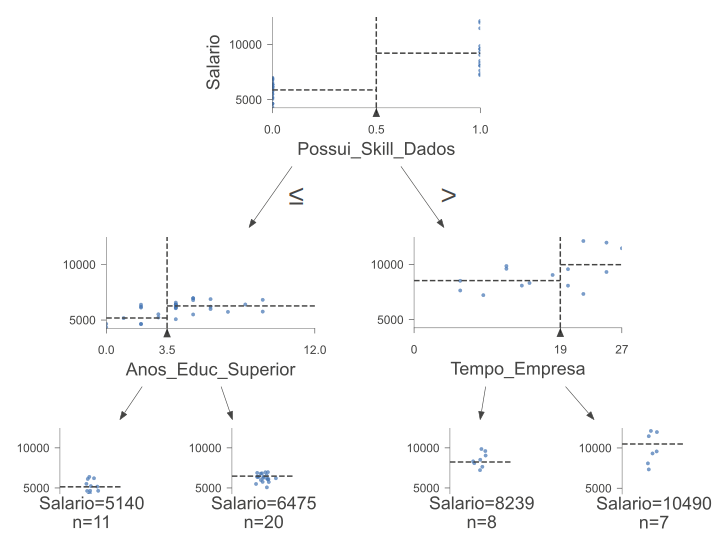

In [21]:
viz.view(precision=0, scale=2.0)

#### Desempenho do Modelo: Teste

In [22]:
# Cálculo do desempenho do modelo: R²
y_pred_test = modelo_salario.predict(x_test)
print('R² Teste: ', round(r2_score(y_test, 
                                   y_pred_test), 2))

R² Teste:  0.54


### Criação de uma função para simplificar o processo

In [23]:
def treina_arvore_regressao(x_train, y_train, x_test, y_test, max_d, min_s):

    modelo = DecisionTreeRegressor(max_depth=max_d,
                                   min_samples_leaf=min_s,
                                   random_state=42)
    modelo.fit(x_train, y_train)
    
    y_pred_train = modelo.predict(x_train)
    y_pred_test = modelo.predict(x_test)
    
    # Cálculo do Desempenho
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    return modelo, (r2_train, r2_test)

In [24]:
treina_arvore_regressao(x_train, y_train, x_test, y_test, 2, 5)

(DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=42),
 (0.8071508890574679, 0.544392089094009))

#### Exploração dos hiperparâmetros: Árvore de Decisão

In [25]:
max_d = list()
min_s = list()
r2_train = list()
r2_test = list()

for d in range(1, 5):
    for s in range(1, 31):
        max_d.append(d)
        min_s.append(s)
        modelo, r2 = treina_arvore_regressao(x_train, y_train, 
                                     x_test, y_test, 
                                     d, s)
        r2_train.append(r2[0])
        r2_test.append(r2[1])
        
busca_ad = pd.DataFrame(list(zip(max_d, min_s, r2_train, r2_test)), 
                        columns=['Max Depth', 'Min Samples Leaf', 
                                 'R2 Train', 'R2 Test'])
busca_ad['Diferença'] = busca_ad['R2 Test'] - busca_ad['R2 Train']
busca_ad

,Max Depth,Min Samples Leaf,R2 Train,R2 Test,Diferença
0,1,1,0.634051,0.777422,0.143371
1,1,2,0.634051,0.777422,0.143371
2,1,3,0.634051,0.777422,0.143371
3,1,4,0.634051,0.777422,0.143371
4,1,5,0.634051,0.777422,0.143371
...,...,...,...,...,...
115,4,26,0.000000,-0.004246,-0.004246
116,4,27,0.000000,-0.004246,-0.004246
117,4,28,0.000000,-0.004246,-0.004246
118,4,29,0.000000,-0.004246,-0.004246


In [26]:
def analise_hiperparametro(hp):
    sns.set()

    fig, axes = plt.subplots(1, 2, figsize=(9, 4))
    fig.suptitle(t='Análise do Hiperparâmetro: '+hp, fontsize=12)

    sns.lineplot(ax=axes[0], x=busca_ad[hp], y=busca_ad['R2 Train'])
    sns.lineplot(ax=axes[0], x=busca_ad[hp], y=busca_ad['R2 Test'])
    axes[0].legend(labels=['Treino', 'Teste'])

    sns.lineplot(ax=axes[1], x=busca_ad[hp], y=busca_ad['Diferença'])

    fig.tight_layout()    

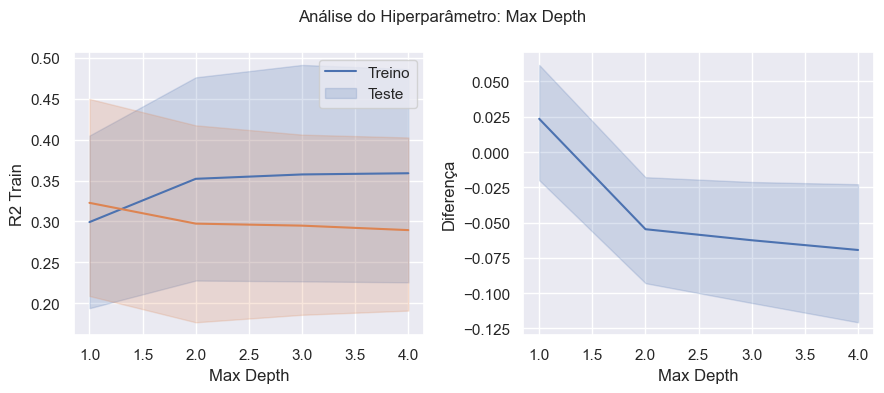

In [27]:
analise_hiperparametro('Max Depth')

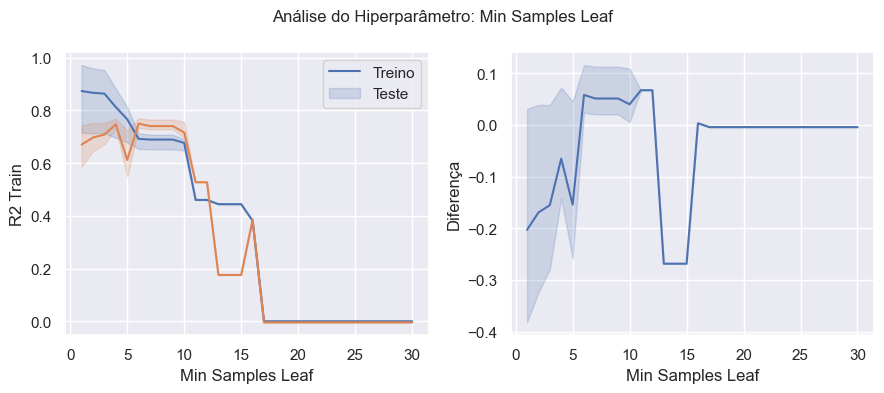

In [28]:
analise_hiperparametro('Min Samples Leaf')

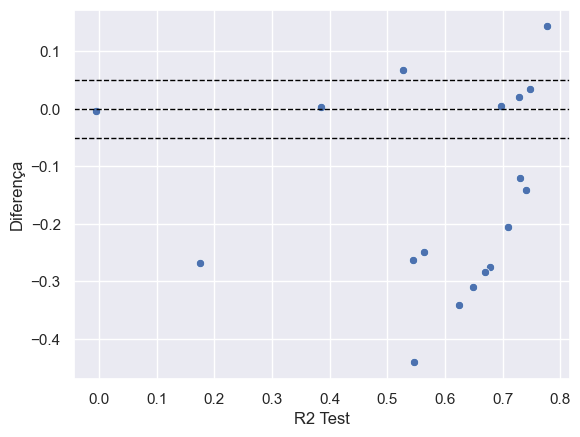

In [29]:
desemp_graf = sns.scatterplot(x=busca_ad['R2 Test'], 
                              y=busca_ad['Diferença'])
ax1 = desemp_graf.axes
ax1.axhline( 0, color='black', ls='--', linewidth = 1)
ax1.axhline(-0.05, color='black', ls='--', linewidth = 1)
ax1.axhline( 0.05, color='black', ls='--', linewidth = 1)
plt.show()

In [30]:
busca_ad.loc[
    (busca_ad['Diferença'] > -0.05) &
    (busca_ad['Diferença'] <  0.05) &
    (busca_ad['R2 Test'] > 0.7)
    ].sort_values(by=['Diferença', 'R2 Test', 'Min Samples Leaf', 'Max Depth'],
                  ascending=[True, False, False, True])

,Max Depth,Min Samples Leaf,R2 Train,R2 Test,Diferença
38,2,9,0.708112,0.728457,0.020345
68,3,9,0.708112,0.728457,0.020345
98,4,9,0.708112,0.728457,0.020345
37,2,8,0.708112,0.728457,0.020345
67,3,8,0.708112,0.728457,0.020345
97,4,8,0.708112,0.728457,0.020345
36,2,7,0.708112,0.728457,0.020345
66,3,7,0.708112,0.728457,0.020345
96,4,7,0.708112,0.728457,0.020345
35,2,6,0.708112,0.728457,0.020345


##### Modelo Analisado 1: Max Depth=2, Min Samples Leaf=9

In [31]:
modelo_d2s9, r2_dss9 = treina_arvore_regressao(x_train, y_train, x_test, y_test, 2, 9)
r2_dss9

(0.7081119104496643, 0.728457177894077)

Text(0.5, 1.0, 'Estimativa de Salários\n Utilizando Árvores de Decisão')

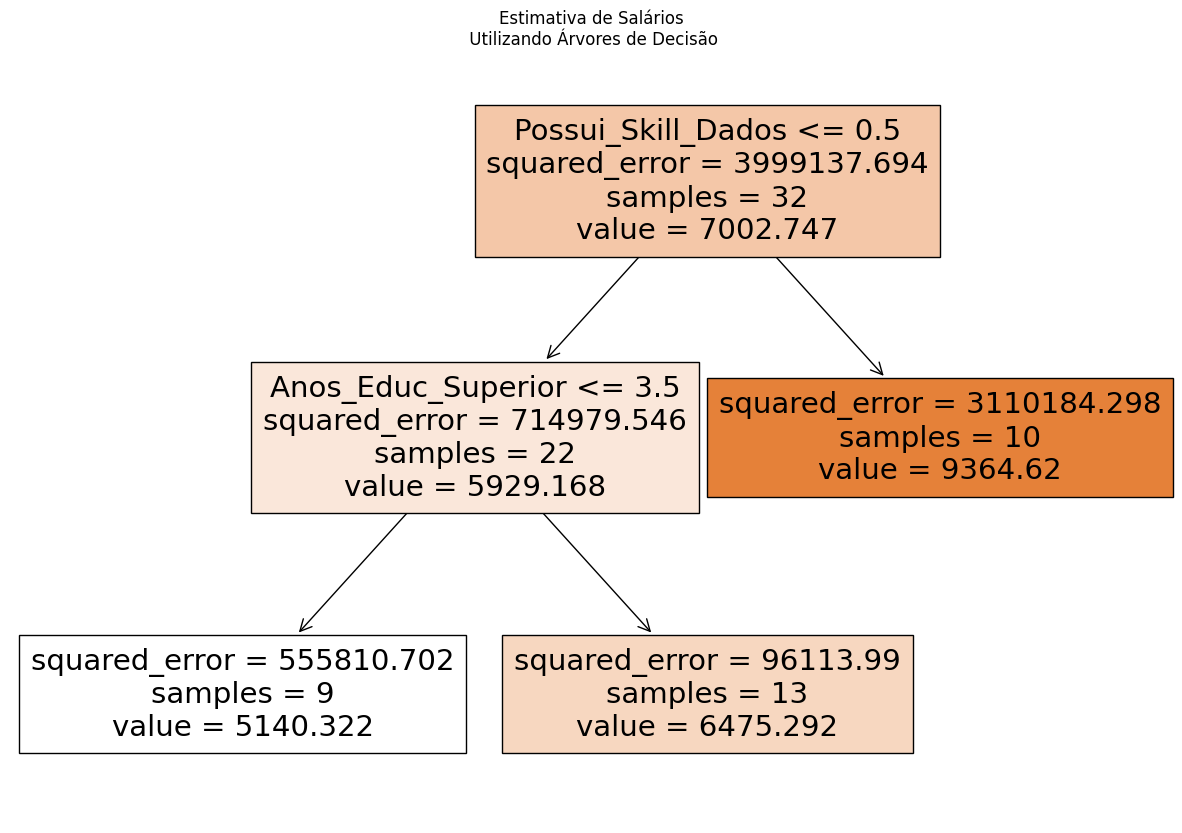

In [38]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_d2s9,
               feature_names=features,
               filled=True)
plt.title("Estimativa de Salários\n Utilizando Árvores de Decisão")

In [34]:
viz = dtreeviz.model(modelo_d2s9, 
               X_train=x_train, y_train=y_train, 
               target_name='Salario',
               feature_names=features)

/home/lucasmateus/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


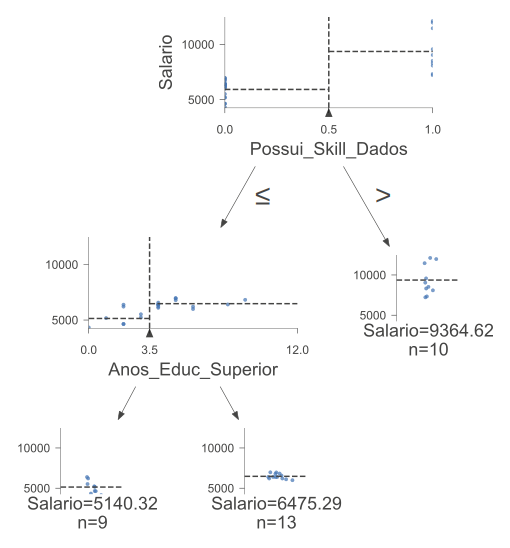

In [35]:
viz.view(scale=2.0)

##### Modelo Analisado 2: Max Depth=3, Min Samples Leaf=6

In [36]:
modelo_d3s6, r2_d3s6 = treina_arvore_regressao(x_train, y_train, x_test, y_test, 3, 6)
r2_d3s6

(0.7132799002238015, 0.7475024656425617)

Text(0.5, 1.0, 'Estimativa de Salários\n Utilizando Árvores de Decisão')

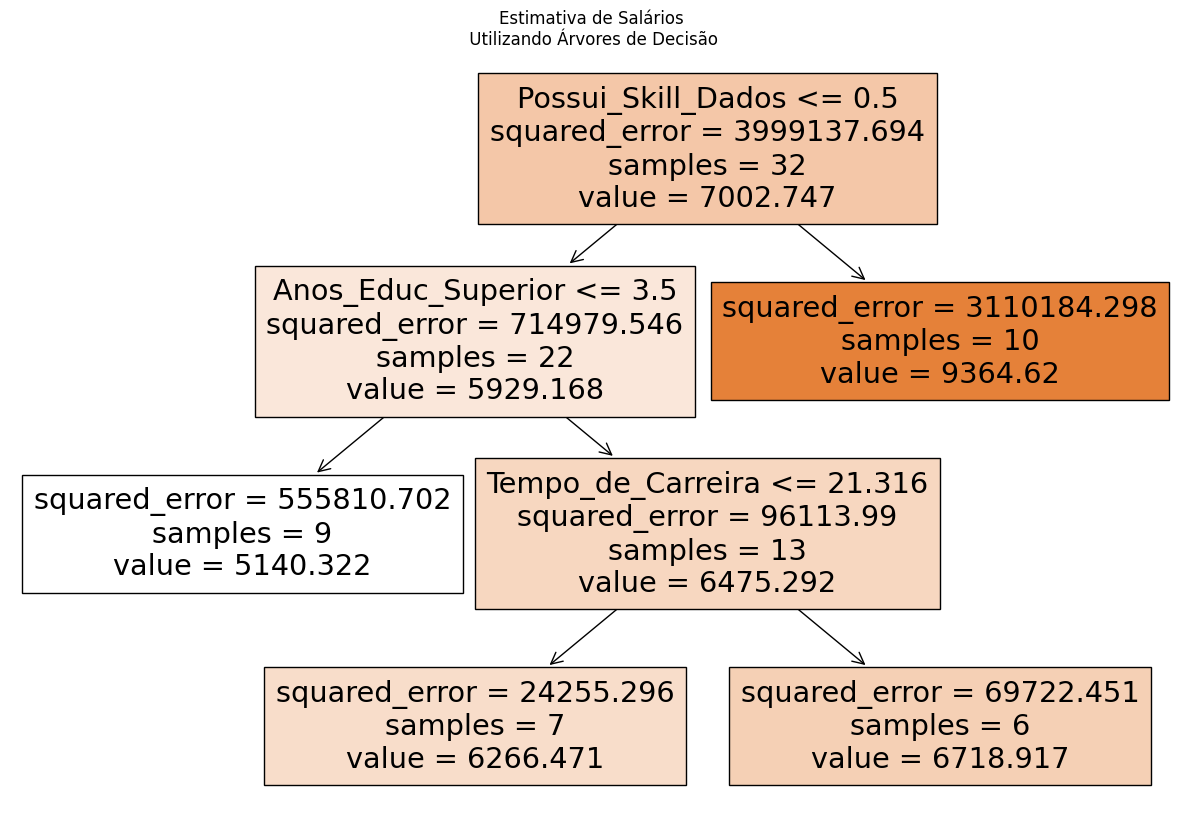

In [37]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_d3s6,
               feature_names=features,
               filled=True)
plt.title("Estimativa de Salários\n Utilizando Árvores de Decisão")

In [39]:
viz = dtreeviz.model(modelo_d3s6, 
               X_train=x_train, y_train=y_train, 
               target_name='Salario',
               feature_names=features)

/home/lucasmateus/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


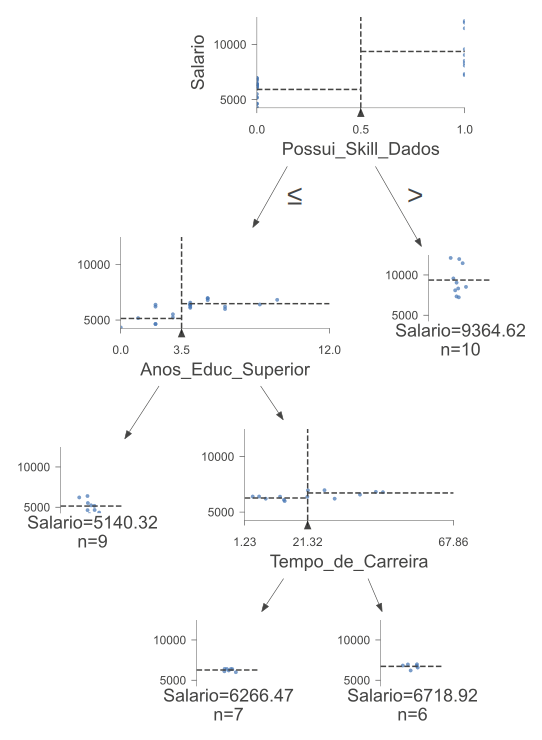

In [41]:
viz.view(scale=2.0)